In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [135]:
data = pd.read_csv("winequality-red.csv",";")
data.describe()

/usr/local/anaconda3/envs/pls/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     0.135710  
std       0.154386     0.169507     1.065668     0.342587  
min       2.740000     0.330000     8.400000     0.000000  
25%       3.210000     0.550000     9.500000     0.000000  
50%       3.310000     0.620000    10.200000     0.000000  
75%       3.400000     0.730000    11.100000     0.000000  
max       4.010000     2.000000    14.900000     1.000000

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Informação dos dados
Label -> _quality_
- 0 -> mau
- 1 -> bom 

In [137]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        0  
4      9.4        0

### Missing Values
Como se pode ver no gráfico abaixo, não existem missing values nas colunas do dataset.

<AxesSubplot:>

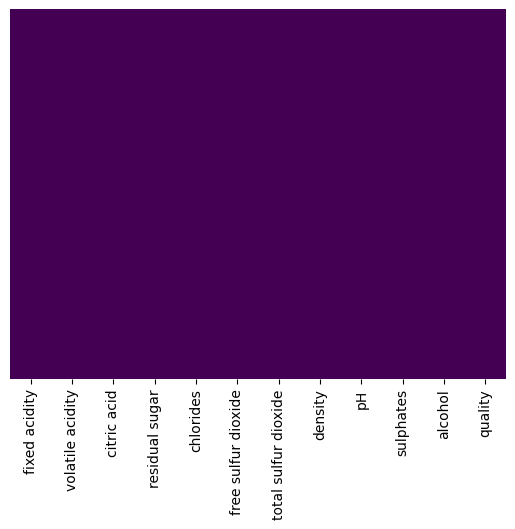

In [138]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [139]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Remoção dos registos duplicados

In [140]:
data  = data.drop_duplicates(keep='first')
data = data.reset_index(drop=True)

### Análise da Distribuição dos dados 

<AxesSubplot:ylabel='alcohol'>

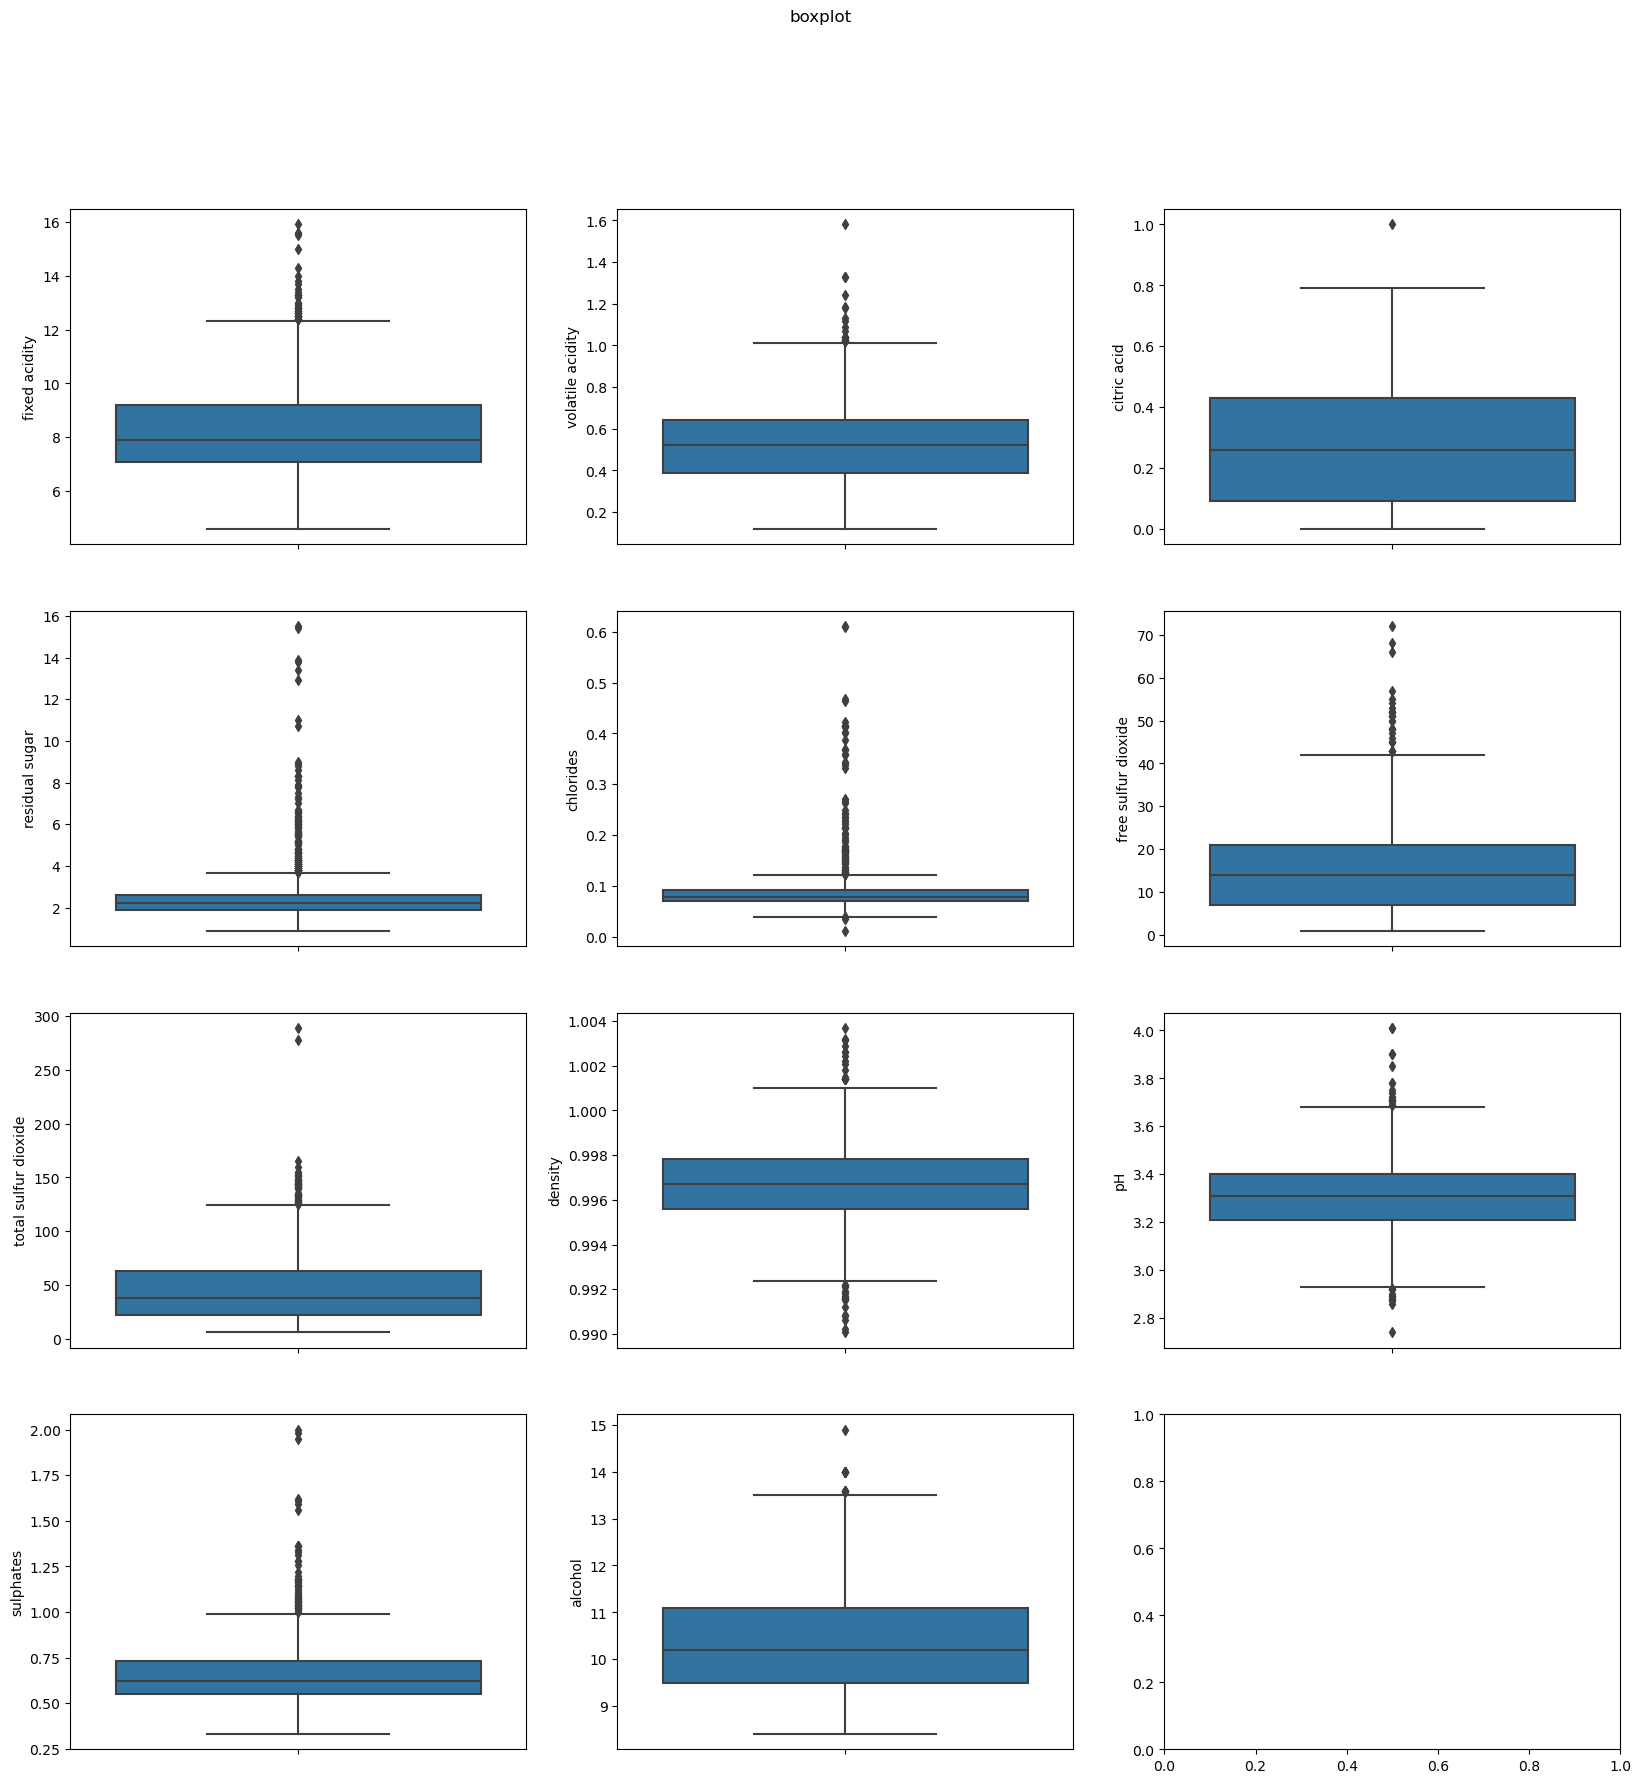

In [141]:
fig, axs = plt.subplots(4,3,figsize=(20,20))
fig.suptitle("boxplot")
sns.boxplot(y=data["fixed acidity"],ax=axs[0,0])
sns.boxplot(y=data["volatile acidity"],ax=axs[0,1])
sns.boxplot(y=data["citric acid"],ax=axs[0,2])

sns.boxplot(y=data["residual sugar"],ax=axs[1,0])
sns.boxplot(y=data["chlorides"],ax=axs[1,1])
sns.boxplot(y=data["free sulfur dioxide"],ax=axs[1,2])

sns.boxplot(y=data["total sulfur dioxide"],ax=axs[2,0])
sns.boxplot(y=data["density"],ax=axs[2,1])
sns.boxplot(y=data["pH"],ax=axs[2,2])

sns.boxplot(y=data["sulphates"],ax=axs[3,0])
sns.boxplot(y=data["alcohol"],ax=axs[3,1])



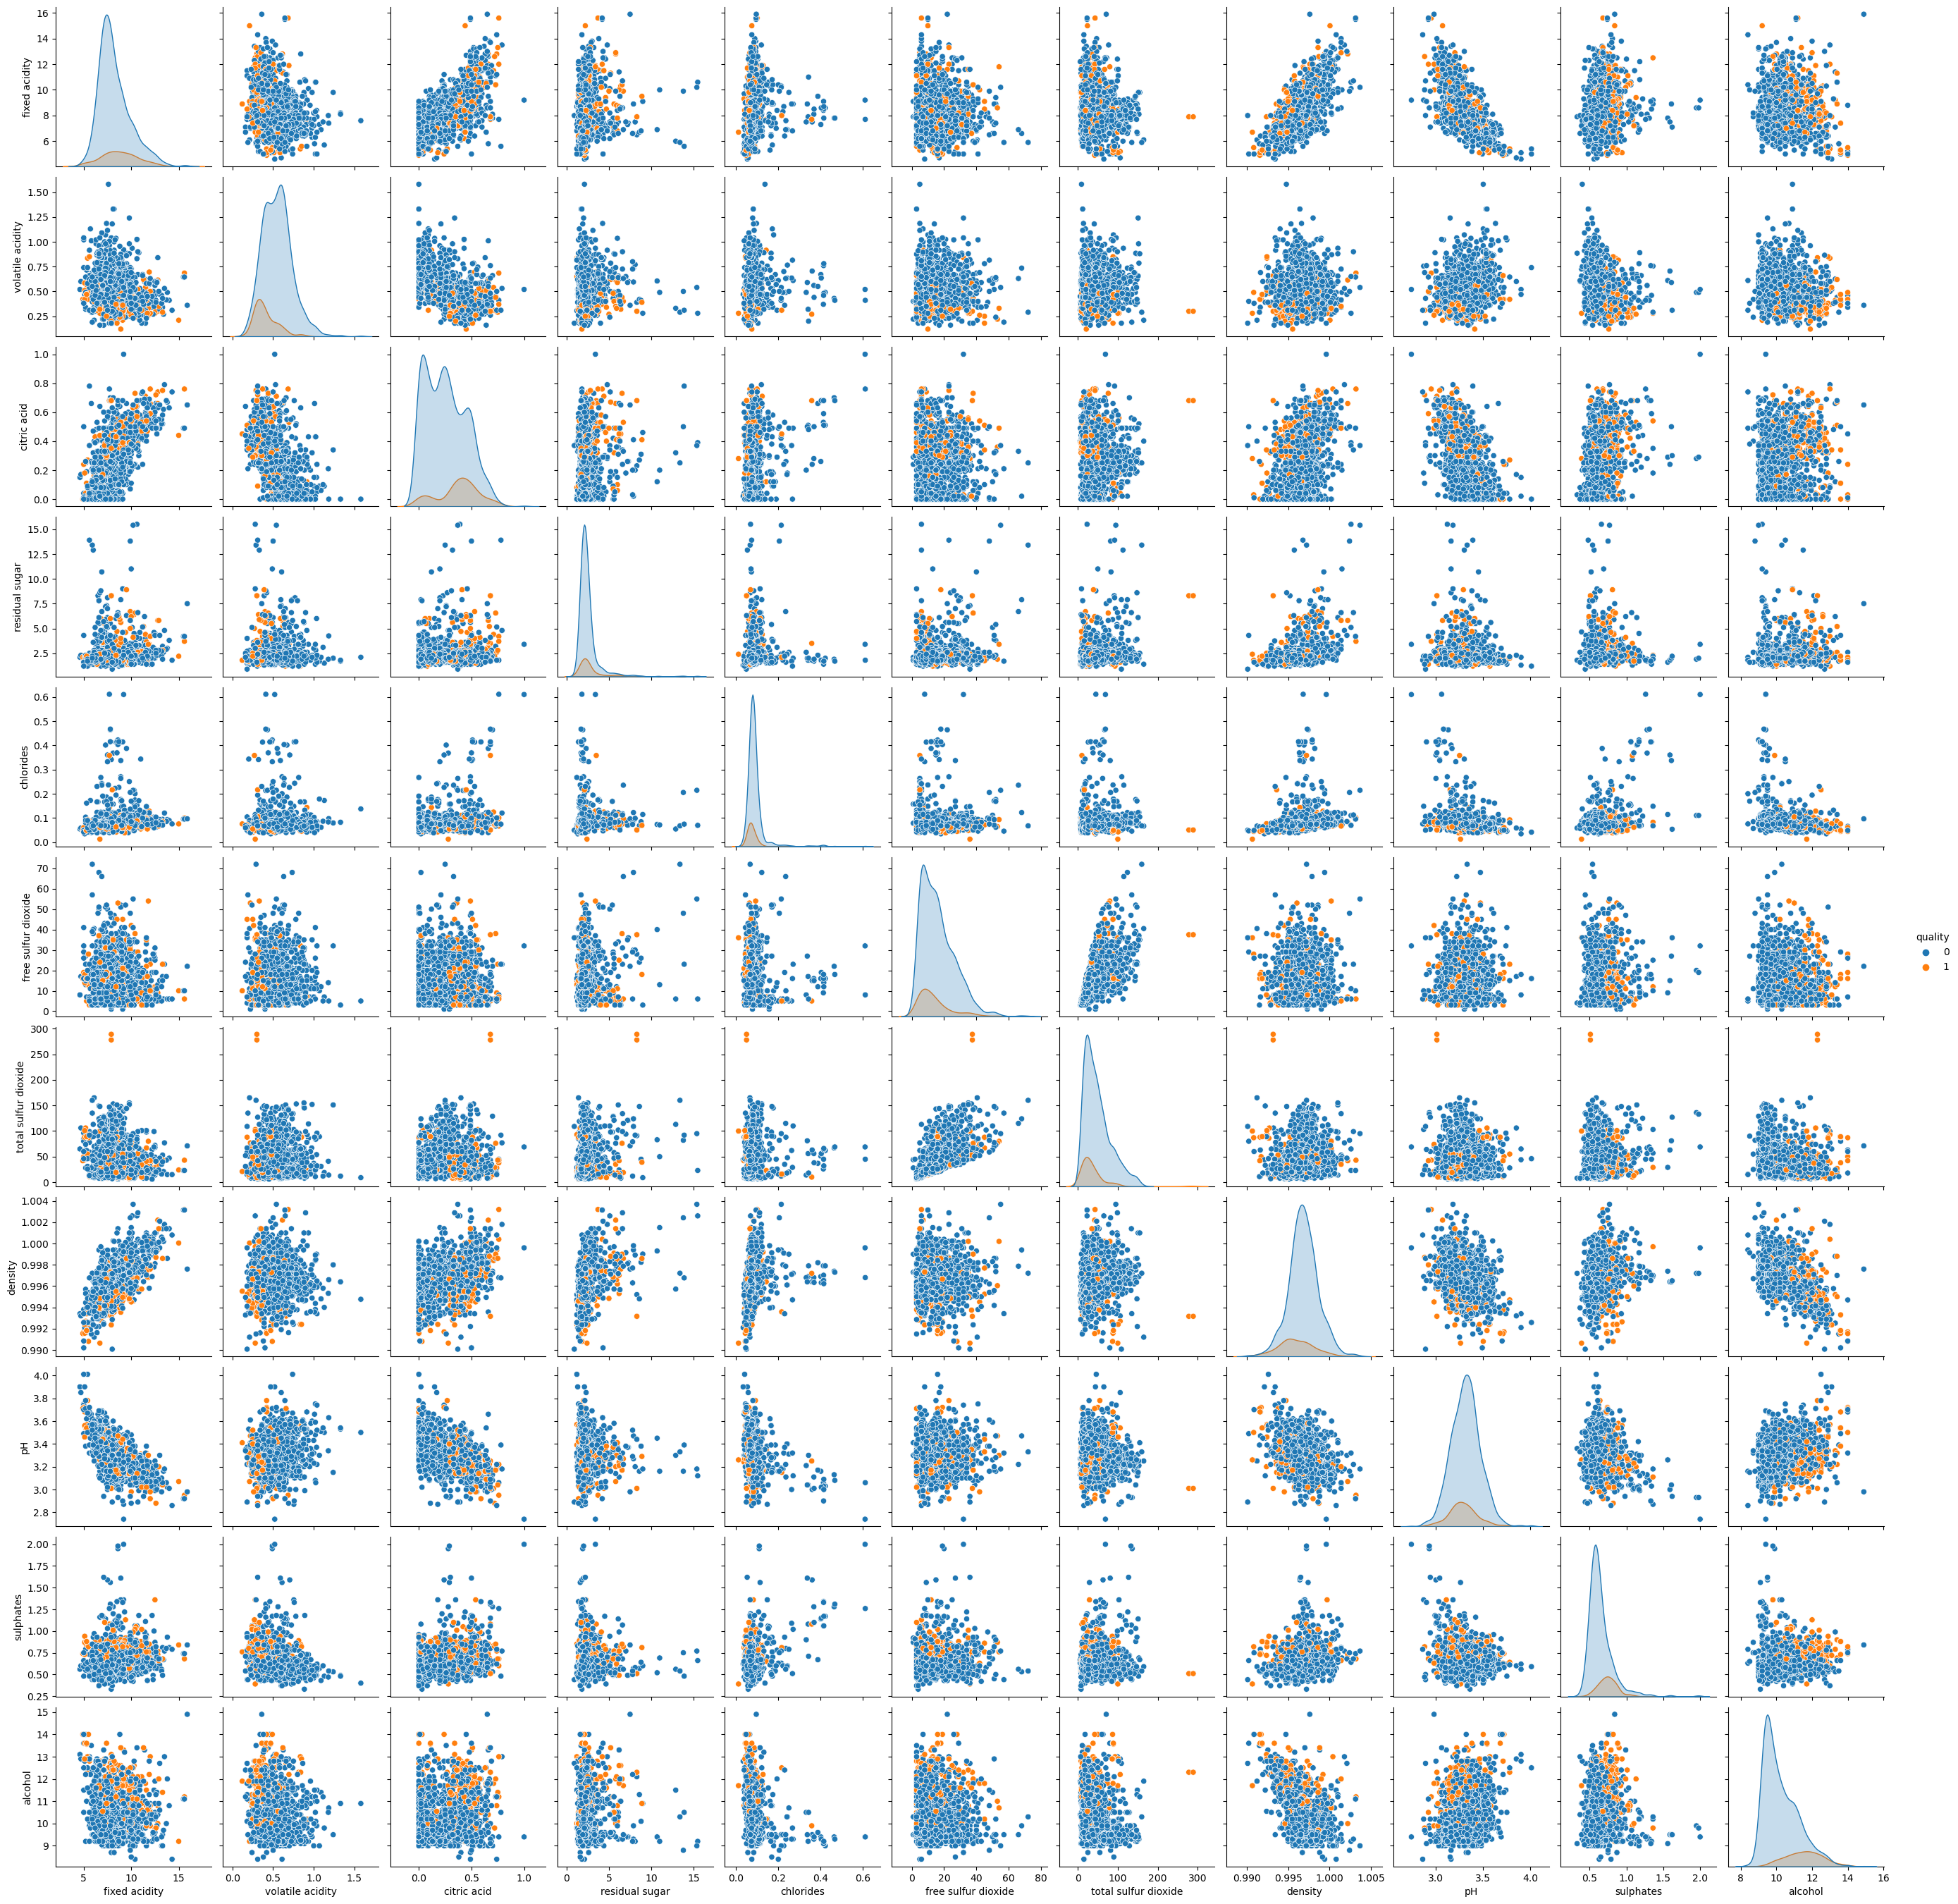

In [142]:
#sns.pairplot(data, hue="quality")

### Análise de correlação linear

<AxesSubplot:>

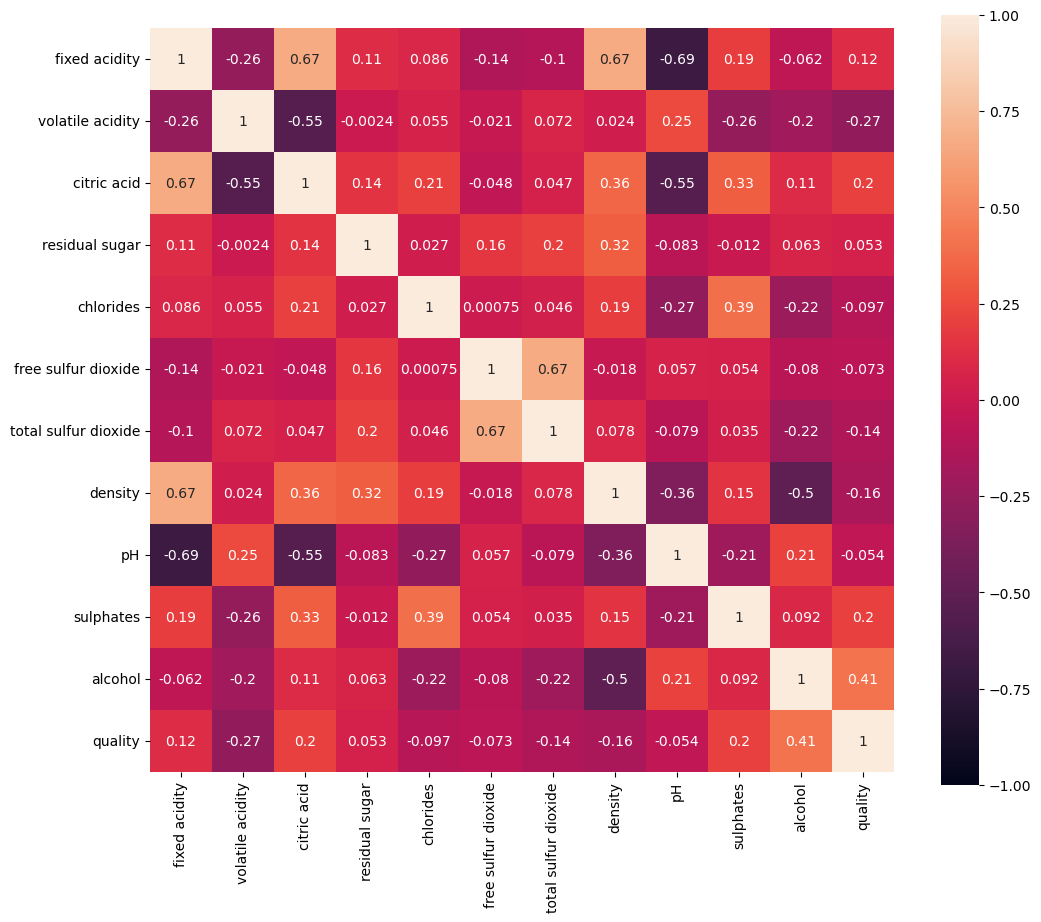

In [143]:
corr_matrix= data.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix,vmin=-1,vmax=1,square=True, annot=True)

Foram encontradas grandes correlações entre os seguintes pares de _features_
<pre>
- pH e fixed acidity                         -> correlação negativa de 0.68 
- pH e citrid acid                           -> correlação negativa de 0.54
- alcohol e density                          -> correlação negativa de 0.5
- citric acid e volatile acidity             -> correlação negativa de 0.55
- citric acid e fixed accidity               -> correlação positiva de 0.67
- density e fixed accidity                   -> correlação positiva de 0.67
- free sulfur dioxide e total sulfur dioxide -> correlação positiva de 0.67 
</pre>

### Análise do desvio padrão dos dados

In [144]:
print(data.std())

fixed acidity            1.736990
volatile acidity         0.183031
citric acid              0.195537
residual sugar           1.352314
chlorides                0.049377
free sulfur dioxide     10.447270
total sulfur dioxide    33.408946
density                  0.001869
pH                       0.155036
sulphates                0.170667
alcohol                  1.082065
quality                  0.342270
dtype: float64


In [145]:
print(data.skew())

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 2.133662
dtype: float64


Depois da análise da correlação linear decidiu-se remover os seguintes _features_
- density
- 

### Análise com dados normalizados

In [165]:
from sklearn.preprocessing import MinMaxScaler

#x=data.drop("quality",axis=1)
#y=data[["quality"]]
#scaler_x = MinMaxScaler(feature_range=(0,1)).fit(x)
#scaler_y = MinMaxScaler(feature_range=(0,1)).fit(y)
#x_scaled=pd.DataFrame(scaler_x.transform(x[x.columns]),columns=x.columns)
#y_scaled=pd.DataFrame(scaler_y.transform(y[y.columns]),columns=y.columns)
#data_normalized = x_scaled
#data_normalized["quality"] = y
#data_normalized.describe()

data_normalized = data.copy()

for col in data_normalized.columns.values.tolist():
    i = 0
    mean = data[col].mean()
    std = data[col].std()
    if col != 'quality':
        for index,row in data_normalized[col].iteritems():   
            #print(col,index,row)
            elem = data.at[index,col]
            data_normalized.at[index,col] = ( elem - mean) / std
            i = i+1

In [166]:
data_normalized.describe()

fixed acidity  volatile acidity   citric acid  residual sugar  \
count   1.359000e+03      1.359000e+03  1.359000e+03    1.359000e+03   
mean   -1.175006e-14      7.074710e-16  3.307958e-15   -4.484190e-16   
std     1.000000e+00      1.000000e+00  1.000000e+00    1.000000e+00   
min    -2.136222e+00     -2.237199e+00 -1.392745e+00   -1.200461e+00   
25%    -6.969506e-01     -7.620420e-01 -9.324733e-01   -4.609874e-01   
50%    -2.363837e-01     -5.178107e-02 -6.307055e-02   -2.391454e-01   
75%     5.120375e-01      6.038444e-01  8.063322e-01    5.664399e-02   
max     4.369285e+00      5.739578e+00  3.721388e+00    9.595850e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  1.359000e+03         1.359000e+03          1.359000e+03  1.359000e+03   
mean   7.717030e-15        -1.274428e-16          1.784404e-16  5.338302e-14   
std    1.000000e+00         1.000000e+00          1.000000e+00  1.000000e+00   
min   -1.541686e+00        -1.425569e+00         -1.222007e+00 -3.552296e+00   
25%   -3.670468e-01        -8.512562e-01         -7.430936e-01 -5.933638e-01   
50%   -1.847752e-01        -1.812247e-01         -2.641800e-01 -4.787669e-03   
75%    5.825359e-02         4.888067e-01          4.841226e-01  5.944898e-01   
max    1.058950e+01         5.370465e+00          7.248778e+00  3.735346e+00   

                 pH     sulphates       alcohol      quality  
count  1.359000e+03  1.359000e+03  1.359000e+03  1359.000000  
mean  -2.147640e-14 -4.495579e-15  1.623760e-14     0.135394  
std    1.000000e+00  1.000000e+00  1.000000e+00     0.342270  
min   -3.675182e+00 -1.926003e+00 -1.878182e+00     0.000000  
25%   -6.436338e-01 -6.369421e-01 -8.616072e-01     0.000000  
50%    1.376401e-03 -2.267864e-01 -2.146963e-01     0.000000  
75%    5.818856e-01  4.177440e-01  6.170464e-01     0.000000  
max    4.516448e+00  7.859140e+00  4.128849e+00     1.000000

<AxesSubplot:>

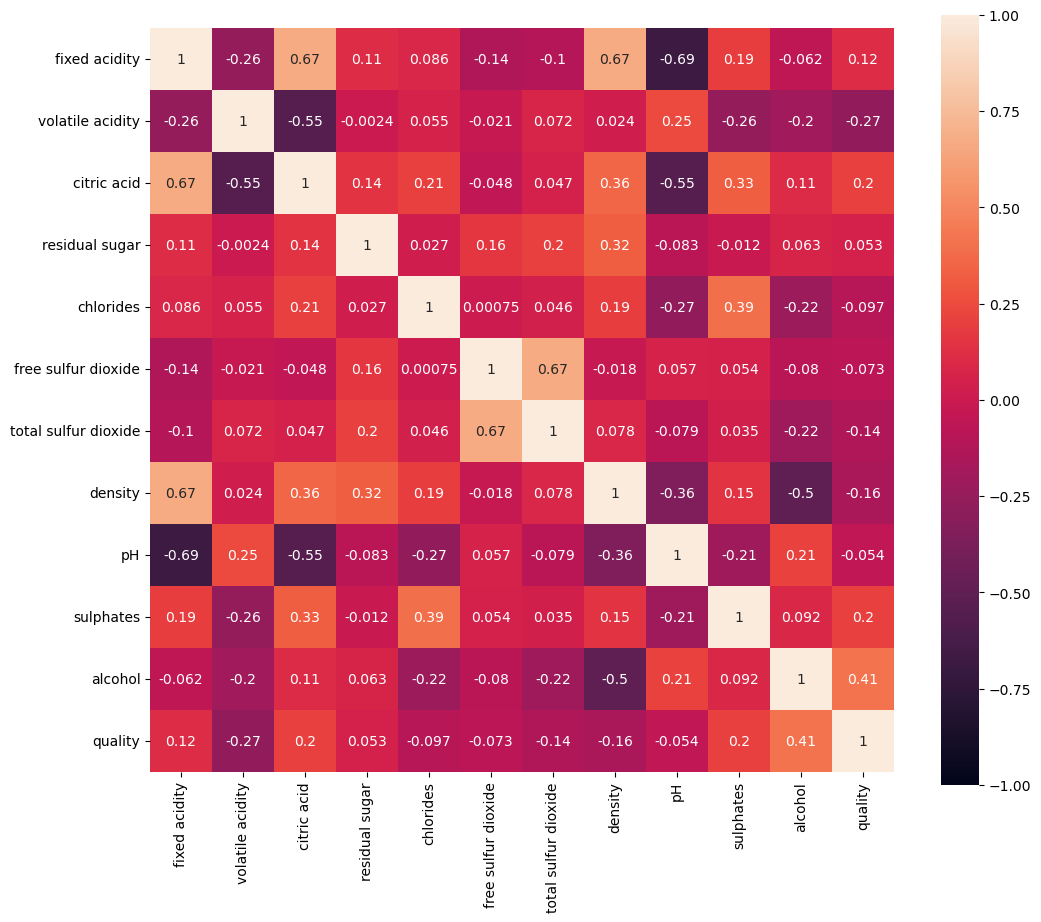

In [112]:
corr_matrix= data.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix,vmin=-1,vmax=1,square=True, annot=True)

<AxesSubplot:ylabel='alcohol'>

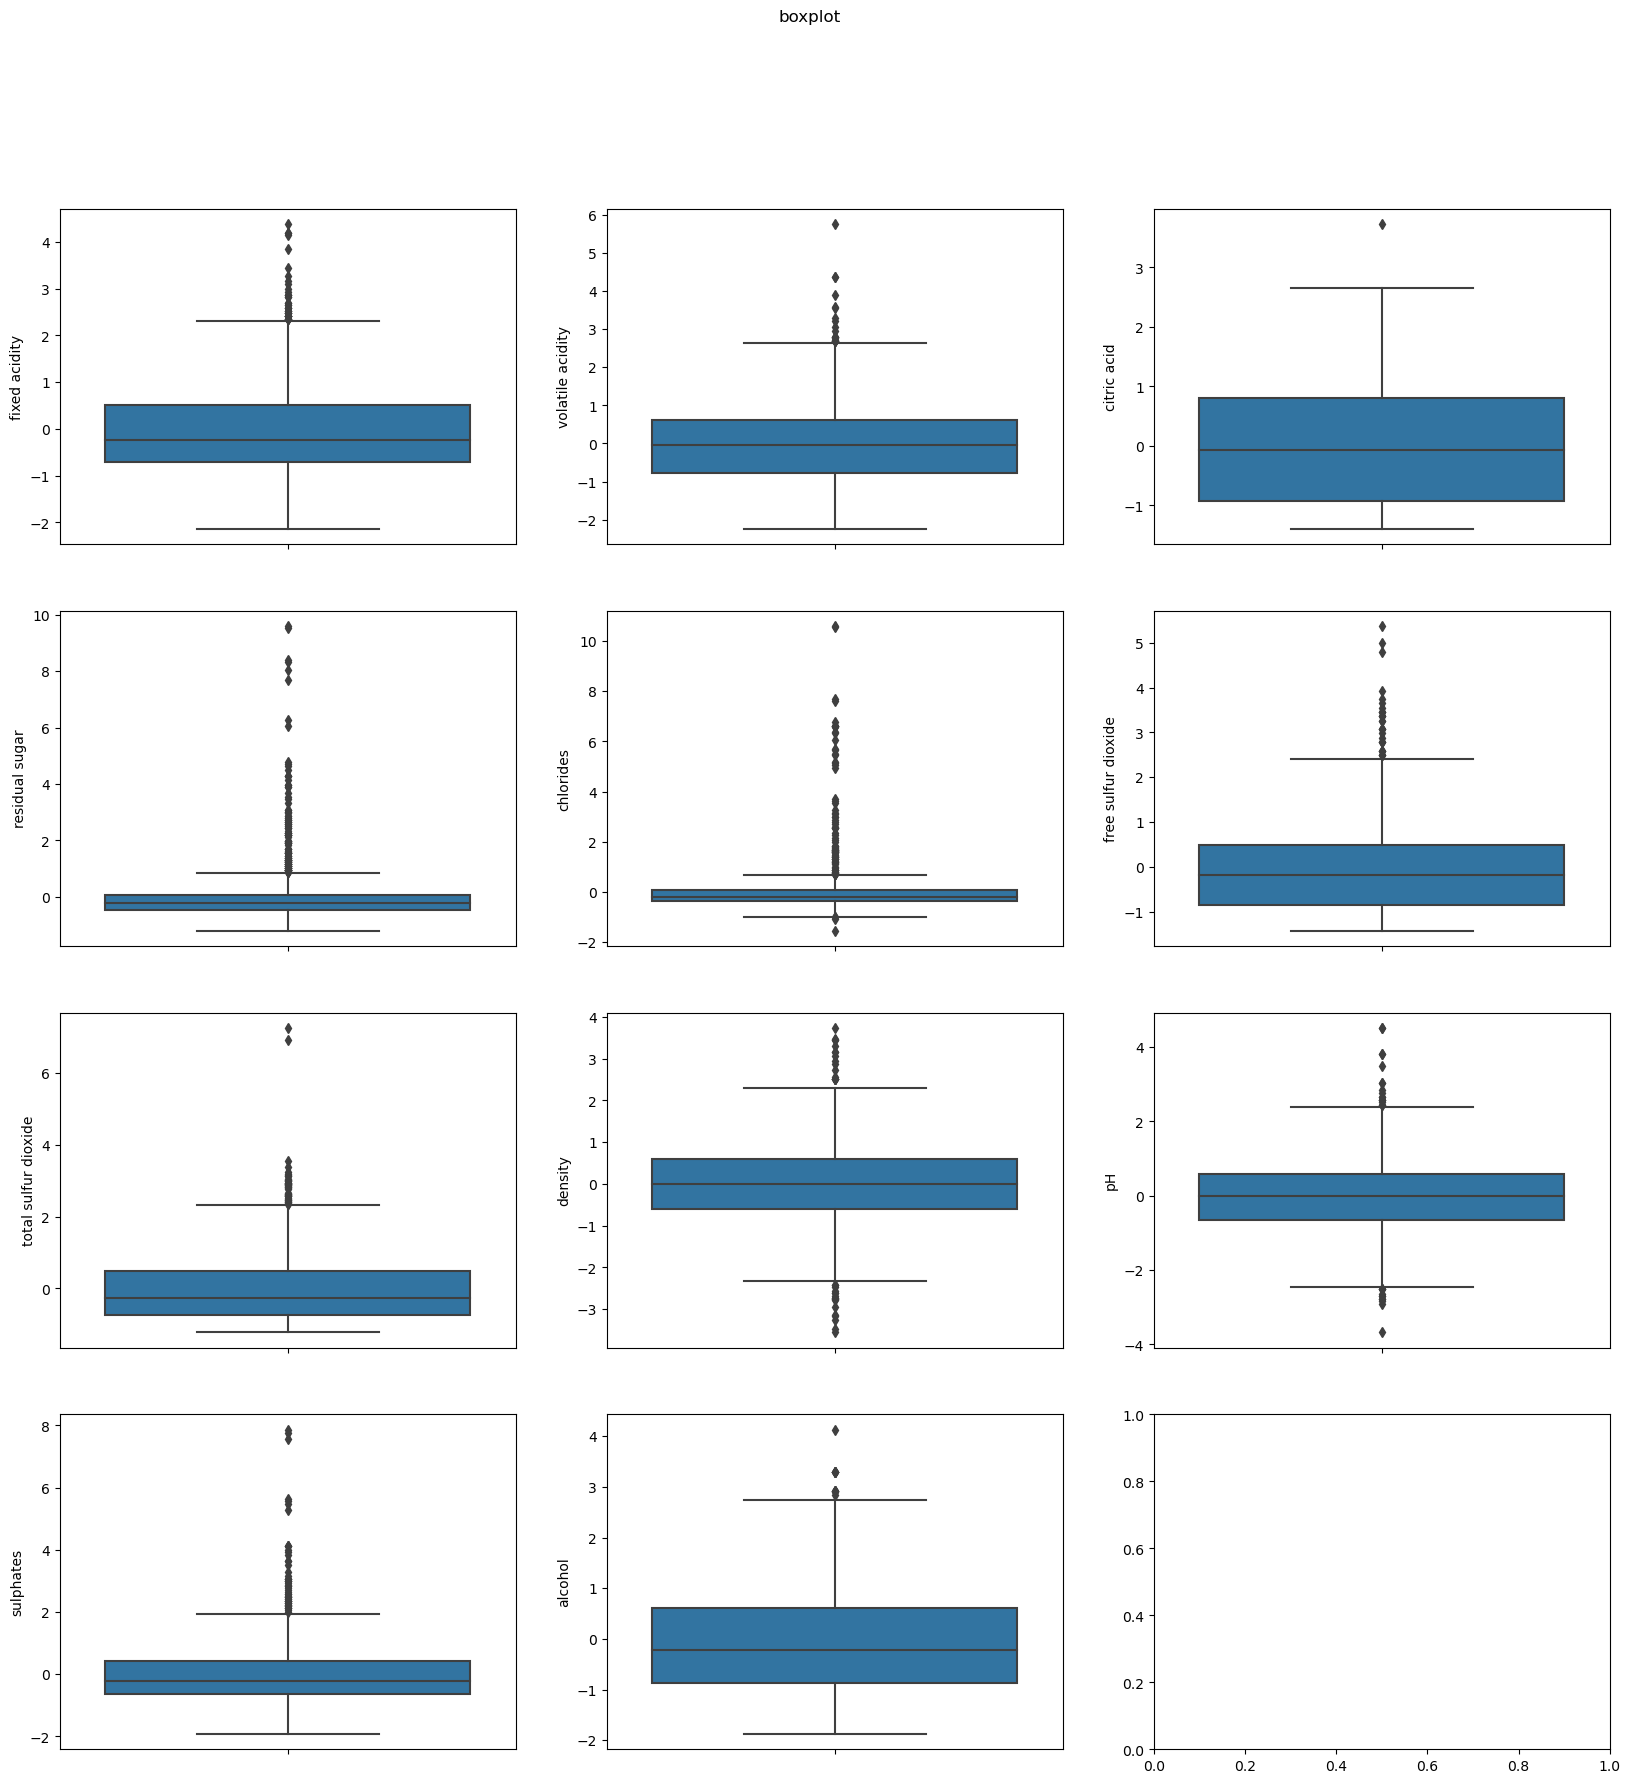

In [149]:
fig, axs = plt.subplots(4,3,figsize=(20,20))
fig.suptitle("boxplot")
sns.boxplot(y=data_normalized["fixed acidity"],ax=axs[0,0])
sns.boxplot(y=data_normalized["volatile acidity"],ax=axs[0,1])
sns.boxplot(y=data_normalized["citric acid"],ax=axs[0,2])
sns.boxplot(y=data_normalized["residual sugar"],ax=axs[1,0])
sns.boxplot(y=data_normalized["chlorides"],ax=axs[1,1])
sns.boxplot(y=data_normalized["free sulfur dioxide"],ax=axs[1,2])
sns.boxplot(y=data_normalized["total sulfur dioxide"],ax=axs[2,0])
sns.boxplot(y=data_normalized["density"],ax=axs[2,1])
sns.boxplot(y=data_normalized["pH"],ax=axs[2,2])
sns.boxplot(y=data_normalized["sulphates"],ax=axs[3,0])
sns.boxplot(y=data_normalized["alcohol"],ax=axs[3,1])

Correlação linear entre os dados não se alterou com a normalização dos dados

In [150]:
def remove_outliers(df,columns):
    for col in columns:
        print('Working on column: {}'.format(col))

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1    #IQR is interquartile range. 

        inferior_limit = Q1 - 1.5*IQR
        superior_limit = Q3 + 1.5*IQR
        
        filter = (df[col] >= inferior_limit ) & (df[col] <= superior_limit )
        i = 0

        inferior_limit = Q1 - 1.5*IQR
        superior_limit = Q3 + 1.5*IQR

        for rec in df[col]:
            if df.at[i,col] < inferior_limit:
                df.at[i,col] = inferior_limit
            if df.at[i,col] > superior_limit:
                df.at[i,col] = superior_limit
            i = i+1
        
    return df

In [151]:
data2 =  remove_outliers(data_normalized,data_normalized.columns.values.tolist())


Working on column: fixed acidity
Working on column: volatile acidity
Working on column: citric acid
Working on column: residual sugar
Working on column: chlorides
Working on column: free sulfur dioxide
Working on column: total sulfur dioxide
Working on column: density
Working on column: pH
Working on column: sulphates
Working on column: alcohol
Working on column: quality


<AxesSubplot:ylabel='alcohol'>

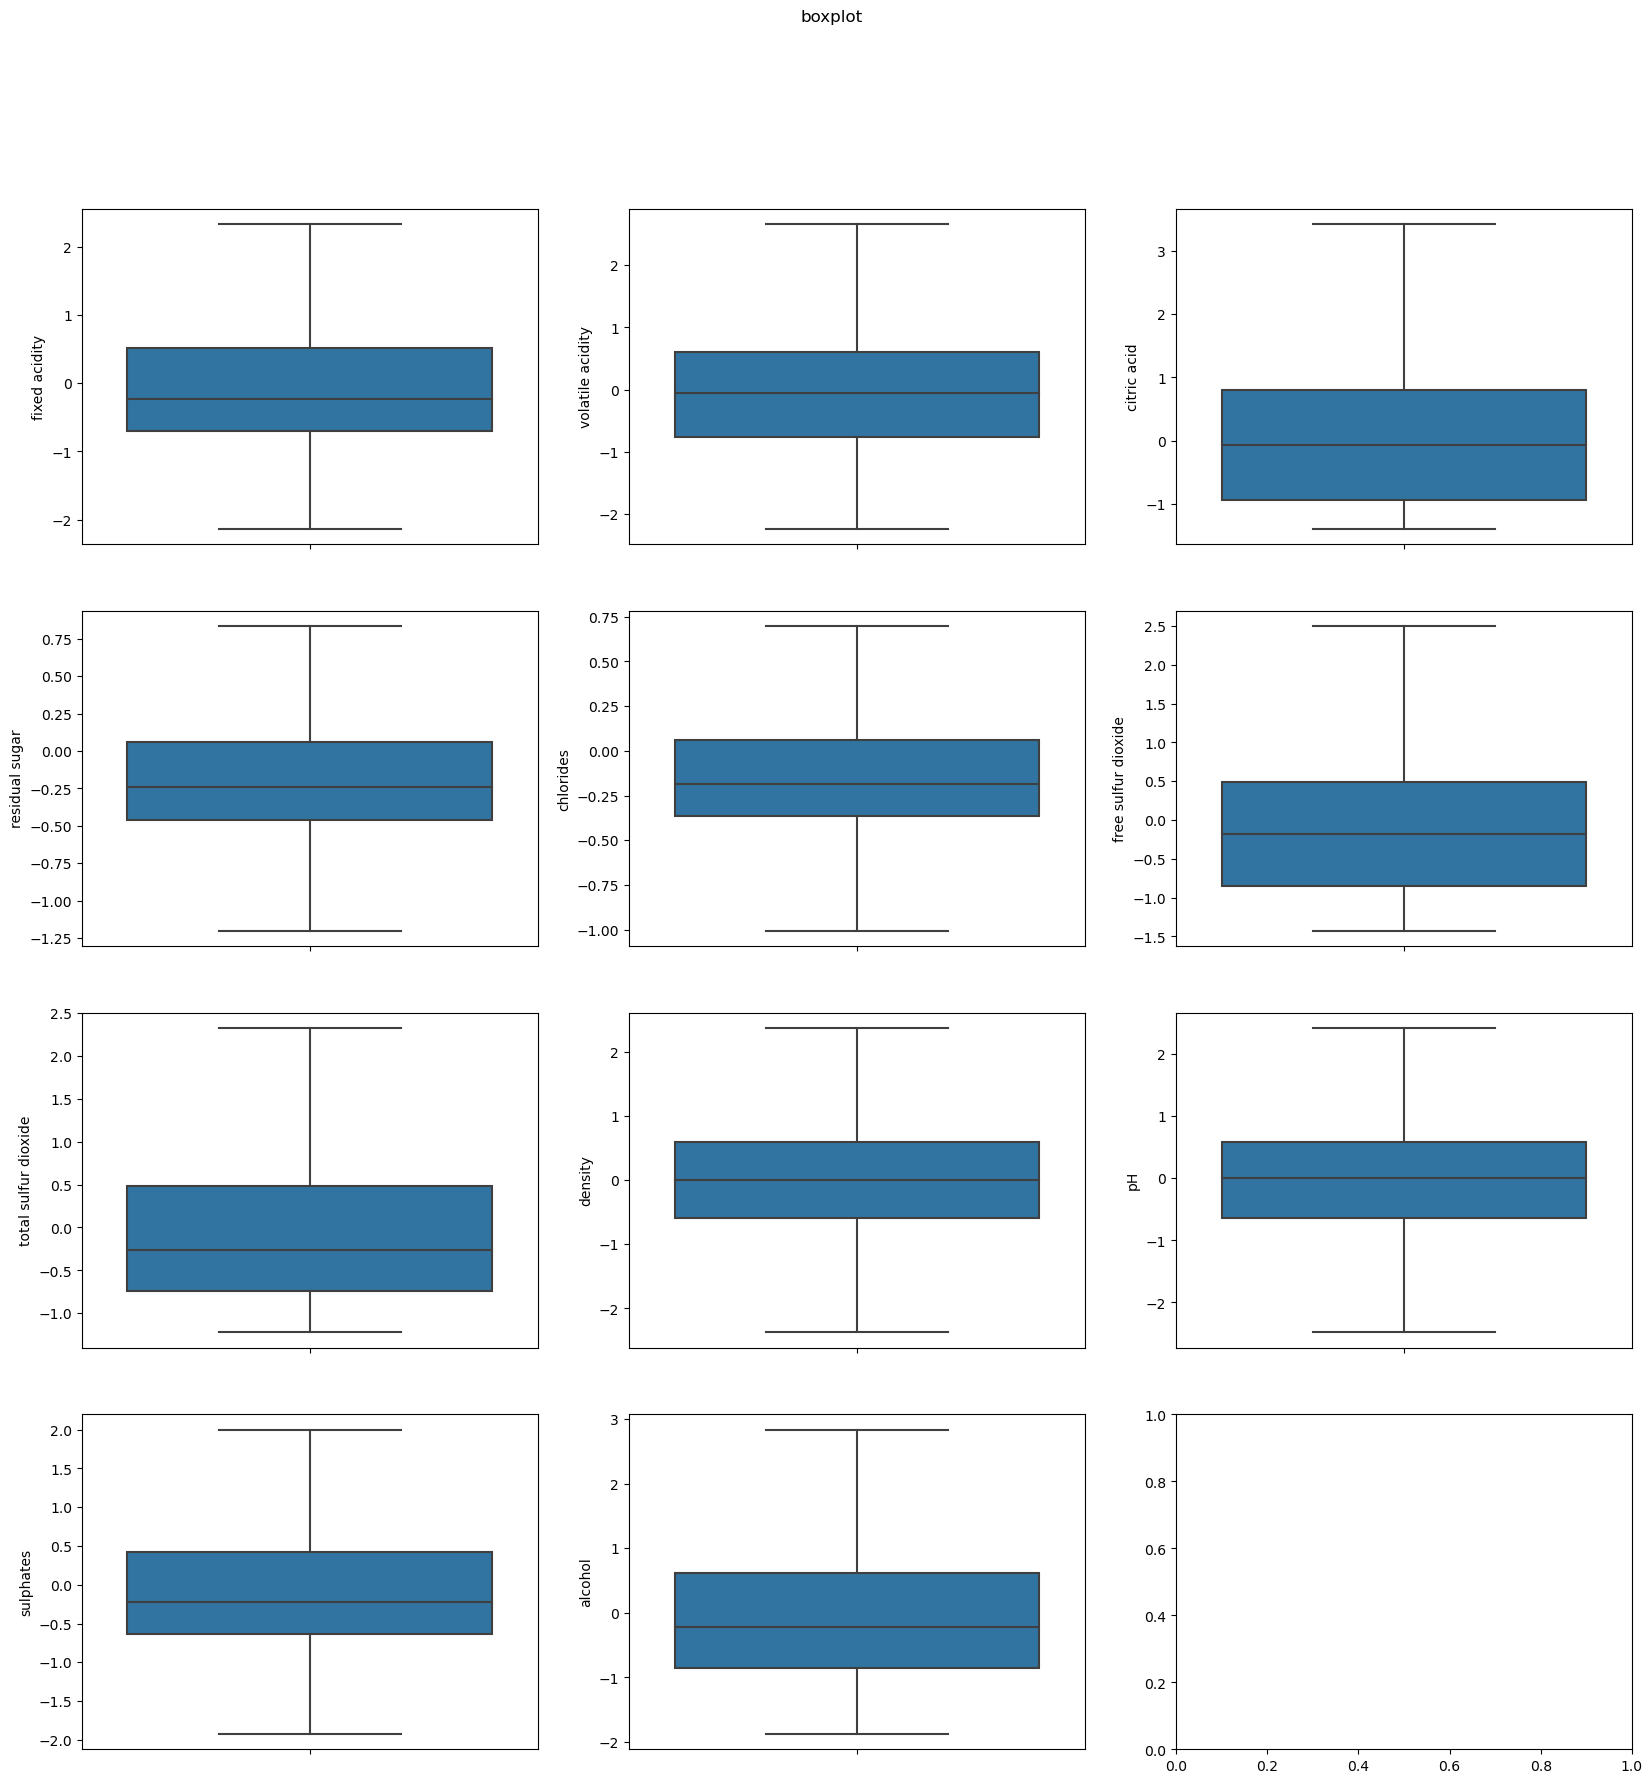

In [152]:
fig, axs = plt.subplots(4,3,figsize=(20,20))
fig.suptitle("boxplot")
sns.boxplot(y=data2["fixed acidity"],ax=axs[0,0])
sns.boxplot(y=data2["volatile acidity"],ax=axs[0,1])
sns.boxplot(y=data2["citric acid"],ax=axs[0,2])
sns.boxplot(y=data2["residual sugar"],ax=axs[1,0])
sns.boxplot(y=data2["chlorides"],ax=axs[1,1])
sns.boxplot(y=data2["free sulfur dioxide"],ax=axs[1,2])
sns.boxplot(y=data2["total sulfur dioxide"],ax=axs[2,0])
sns.boxplot(y=data2["density"],ax=axs[2,1])
sns.boxplot(y=data2["pH"],ax=axs[2,2])
sns.boxplot(y=data2["sulphates"],ax=axs[3,0])
sns.boxplot(y=data2["alcohol"],ax=axs[3,1])


Assim os _outliers_ foram substituídos pelos limites superiores e inferiores

In [98]:
data2.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

<AxesSubplot:xlabel='quality', ylabel='count'>

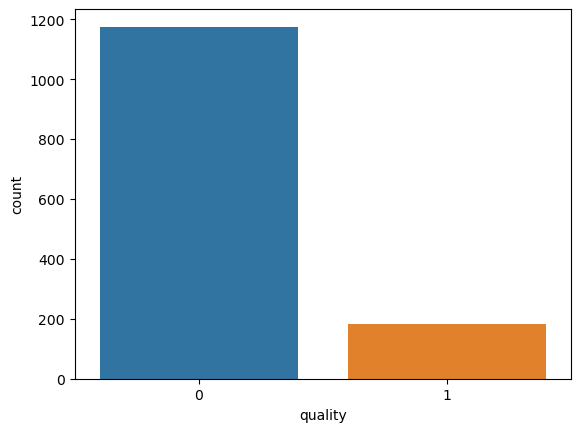

In [153]:
sns.countplot(x="quality",data=data)

In [167]:
count_class_0, count_class_1 = data.quality.value_counts()
data_class_0 = data[data_normalized['quality'] == 0]
data_class_1 = data[data_normalized['quality'] == 1]

data_class_1_over = data_class_1.sample(count_class_0,replace=True)
sample_data_1 = pd.concat([data_class_0,data_class_1_over],axis=0)

print(sample_data_1.quality.value_counts())

0    1175
1    1175
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

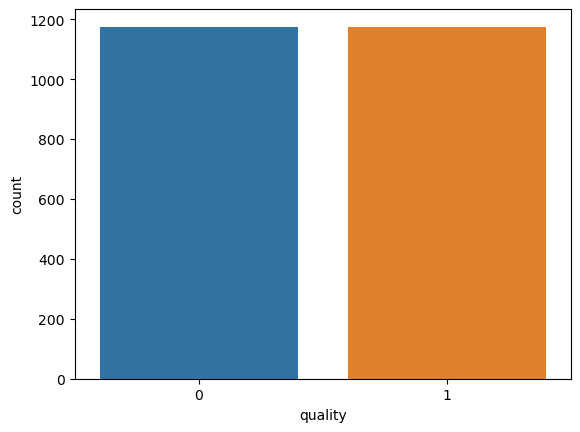

In [168]:
sns.countplot(x="quality",data=sample_data_1)

In [181]:
X = sample_data_1.drop(['quality'],axis=1)
y = sample_data_1['quality']

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=2022)

from sklearn.model_selection import train_test_split
X_train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

clf.fit(X_train,y_train)
predictions = clf.predict(X_Test)

In [182]:
print (f'Train Accuracy - : {clf.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {clf.score(X_Test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.926


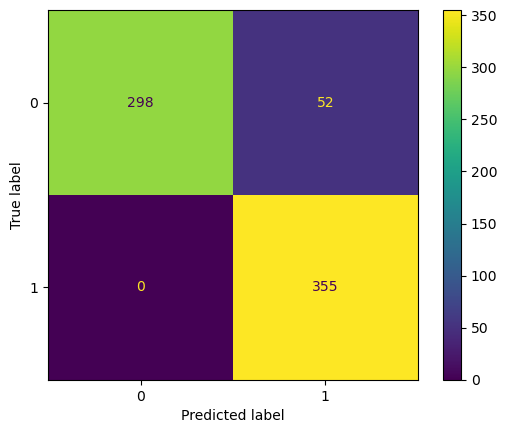

In [183]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictions)
dis = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
dis.plot()
